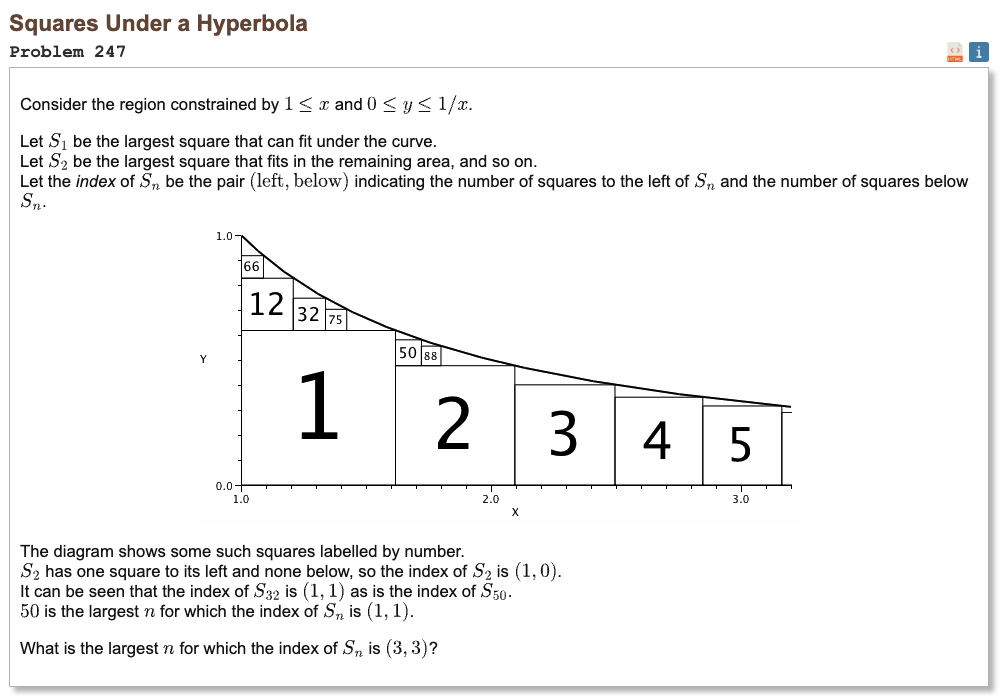

## Initial approach

* the region is 1 ≤ x and 0 ≤ y ≤ 1/x, so the first square starts at the lower left corner (1, 0)
* a square is determined by its lower left corner (x, y), its top right corner lies on the hyperbola, so the side length s satisfies (x+s)(y+s)=1
* solving that gives a direct formula s = 0.5 * (sqrt((x-y)^2 + 4) - x - y), so we can compute the next square size instantly
* after placing a square, the remaining area splits into two independent subregions, one above and one to the right, each produces its own next largest square
* always taking the globally largest available square is a classic best-first process, so we keep a priority queue keyed by side length
* each square carries an index (left, below), the top child increments below, the right child increments left
* we keep generating until it becomes impossible to ever reach index (3,3), by tracking how many queued squares still have left ≤ 3 and below ≤ 3 and left+below < 6
* the last time we pop a square with index (3,3), its pop counter n is the answer

In [1]:
import heapq
from math import sqrt

def side_length(x, y):
    return 0.5 * (sqrt((x - y) * (x - y) + 4.0) - x - y)

def solve():
    target_left = 3
    target_below = 3
    target_sum = target_left + target_below

    heap = []
    uid = 0

    x0, y0, l0, b0 = 1.0, 0.0, 0, 0
    s0 = side_length(x0, y0)
    heapq.heappush(heap, (-s0, uid, x0, y0, l0, b0))
    uid += 1

    def is_candidate(l, b):
        return l <= target_left and b <= target_below and (l + b) < target_sum

    candidates = 1 if is_candidate(l0, b0) else 0

    n = 0
    ans = 0

    while candidates > 0:
        n += 1
        negs, _, x, y, l, b = heapq.heappop(heap)
        s = -negs

        if l == target_left and b == target_below:
            ans = n

        if is_candidate(l, b):
            candidates -= 1

        xt, yt, lt, bt = x, y + s, l, b + 1
        st = side_length(xt, yt)
        heapq.heappush(heap, (-st, uid, xt, yt, lt, bt))
        uid += 1
        if is_candidate(lt, bt):
            candidates += 1

        xr, yr, lr, br = x + s, y, l + 1, b
        sr = side_length(xr, yr)
        heapq.heappush(heap, (-sr, uid, xr, yr, lr, br))
        uid += 1
        if is_candidate(lr, br):
            candidates += 1

    return ans

In [2]:
%%time
result = solve()
print("Result:", result)

Result: 48551
CPU times: user 145 ms, sys: 6.79 ms, total: 152 ms
Wall time: 151 ms
